In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [3]:
import seaborn as sns
import pandas as pd

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop any rows with missing values
penguins = penguins.dropna()

# Display the first few rows
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


In [5]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [17]:
# Subset the data to include only Adelie and Chinstrap species
subset_penguins = penguins[penguins['species'].isin(['Adelie', 'Chinstrap'])]

# Display the subsetted data
print(subset_penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


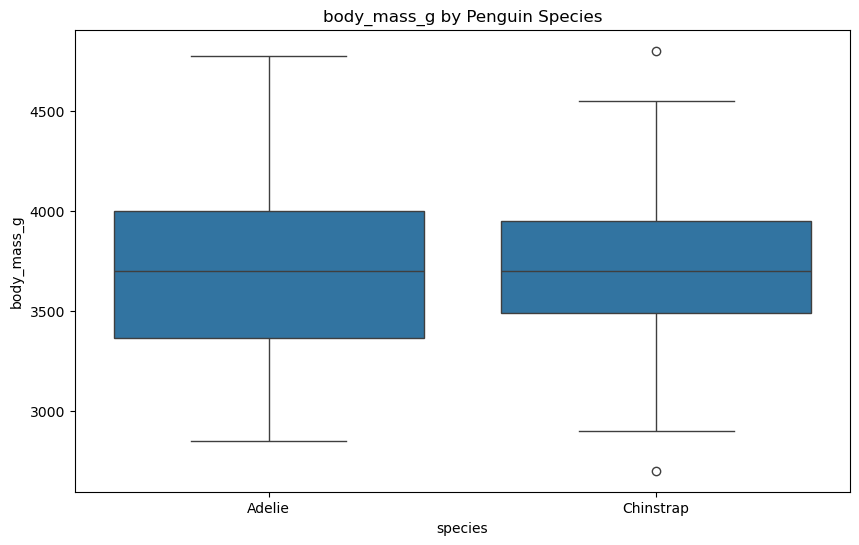

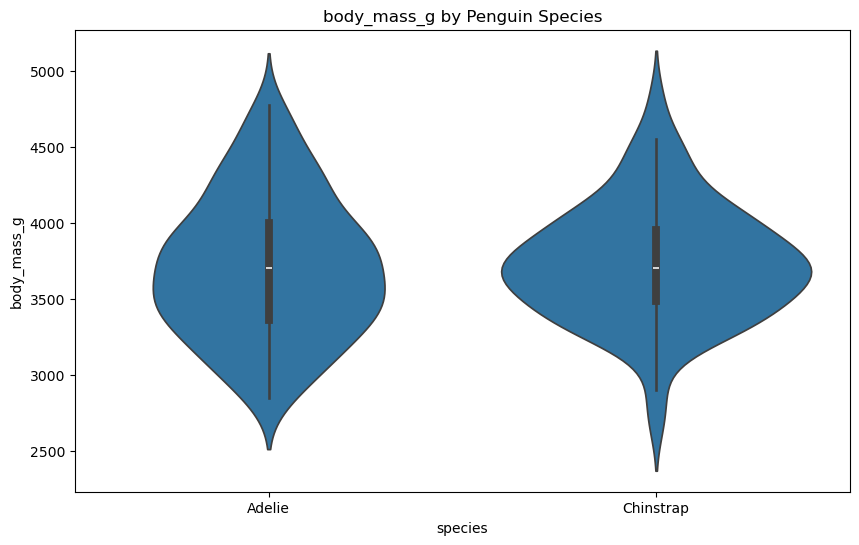

In [19]:
# Boxplot to visualize weight by species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='body_mass_g', data=subset_penguins)
plt.title('body_mass_g by Penguin Species')
plt.show()

# Violin plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='body_mass_g', data=subset_penguins)
plt.title('body_mass_g by Penguin Species')
plt.show()

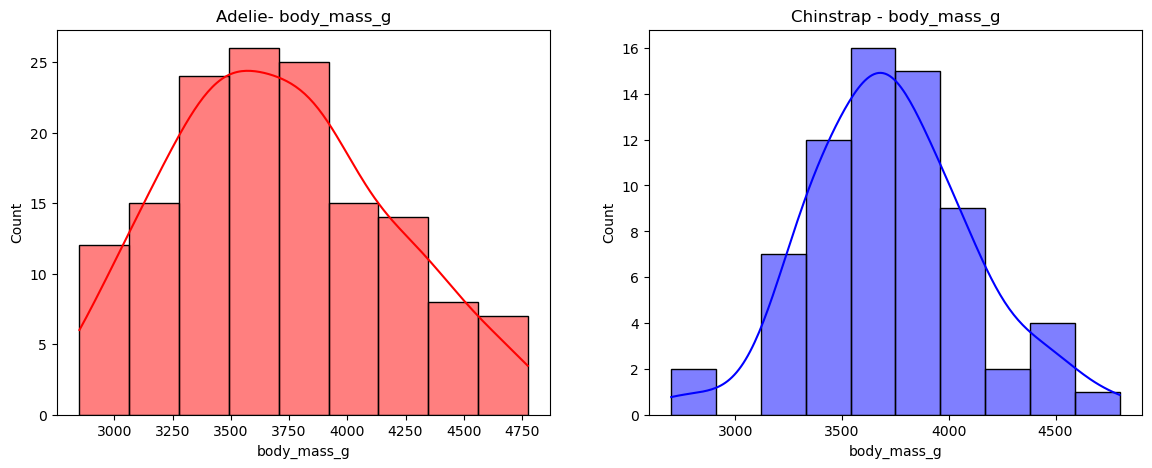

In [21]:
# Split the data into two groups
Adelie_penguin = subset_penguins[subset_penguins['species'] == 'Adelie']['body_mass_g']
Chinstrap_penguin = subset_penguins[subset_penguins['species'] == 'Chinstrap']['body_mass_g']

# Histograms
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(Adelie_penguin, kde=True, color='red')
plt.title('Adelie- body_mass_g')

plt.subplot(1, 2, 2)
sns.histplot(Chinstrap_penguin, kde=True, color='blue')
plt.title('Chinstrap - body_mass_g')
plt.show()

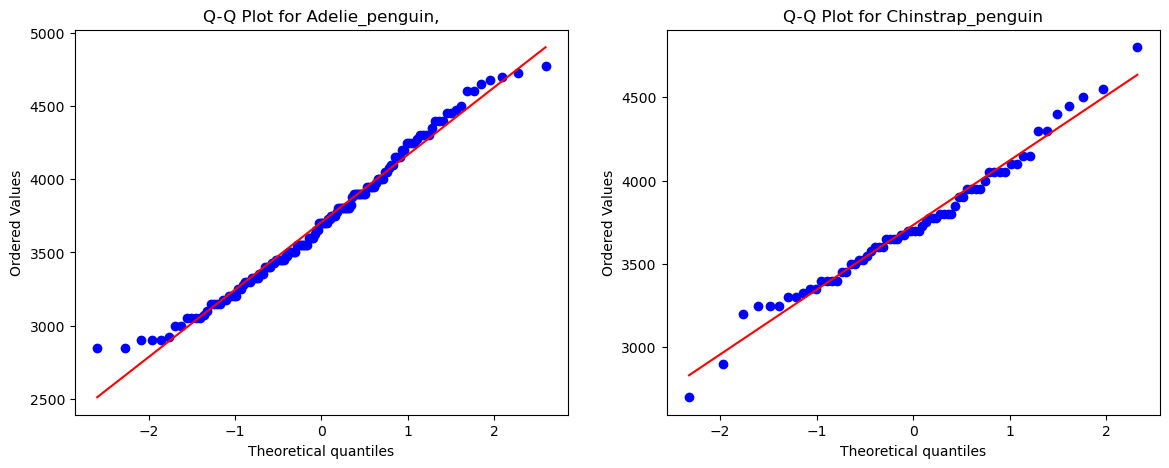

In [25]:
# Q-Q Plots
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
stats.probplot(Adelie_penguin, dist="norm", plot=plt)
plt.title('Q-Q Plot for Adelie_penguin,')

plt.subplot(1, 2, 2)
stats.probplot(Chinstrap_penguin, dist="norm", plot=plt)
plt.title('Q-Q Plot for Chinstrap_penguin')
plt.show()

In [29]:
from scipy.stats import normaltest

# Separate the data into two groups: Adelie and Chinstrap
adelie_body_mass = subset_penguins[subset_penguins['species'] == 'Adelie']['body_mass_g']
Chinstrap_body_mass = subset_penguins[subset_penguins['species'] == 'Chinstrap']['body_mass_g']

# Perform D'Agostino's K-squared test for normality
stat_adelie, p_adelie = normaltest(adelie_body_mass)
stat_Chinstrap, p_Chinstrap = normaltest(Chinstrap_body_mass)

print(f"D'Agostino's test for Adelie: Statistic={stat_adelie:.3f}, p-value={p_adelie:.3f}")
print(f"D'Agostino's test for Chinstrap: Statistic={stat_Chinstrap:.3f}, p-value={p_Chinstrap:.3f}")

D'Agostino's test for Adelie: Statistic=5.322, p-value=0.070
D'Agostino's test for Chinstrap: Statistic=2.010, p-value=0.366


In [31]:
# Perform Levene's Test
stat, p_value = stats.levene(subset_penguins[subset_penguins['species'] == 'Adelie']['body_mass_g'],subset_penguins[subset_penguins['species'] == 'Chinstrap']['body_mass_g'])

print(f"Levene's test statistic: {stat:.3f}")
print(f"Levene's test p-value: {p_value:.3f}")

Levene's test statistic: 4.747
Levene's test p-value: 0.030


In [33]:
stats.ttest_ind(subset_penguins[subset_penguins['species'] == 'Adelie']['body_mass_g'],
                subset_penguins[subset_penguins['species'] == 'Chinstrap']['body_mass_g'],
                equal_var = False, alternative='two-sided') # False means we don't assume equal variances (Welsch's t-test)

TtestResult(statistic=-0.44792967534690686, pvalue=0.6548333152810653, df=154.03261935924448)